### 보조 축 활용하기[2 축 그래프 그리기]

보조 축을 추가하여 2개의 y축을 갖는 그래프를 그릴 수 있다. 

선그래프는 북한 발전량의 전년 대비 증감률을 백분률로 나타낸다. 

증감률을 계산하기 위해 rename() 메소드로 '합계' 열의 이름을 '총발전량'으로 바꾸고, shift() 메소드를 이용하여 '총발전량'열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 -1년'열을 새로 생성한다. 그리고 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률' 열에 저장한다. 

axl 객체는 막대 그래프에 stacked=True옵션을 지정하여, '수력', '화력' 열의 값을 아래 위로 쌓은 형태의 세로형 막대 그래프를 그린다. axl 객체에 twinx()메소드를 적용하여 axl 객체의 쌍둥이 객체를 만들고, 쌍둥이 객체를 ax2 변수에 저장한다.   
ax2 객체에 plot() 메소드를 적용하여 선 그래프를 그린다. 그래프를 그리는데 사용할 데이터는 '증감률'열에서 가져온다. ls='--' 옵션은 선 스타일을 점선으로 설정하는 명령이다. 

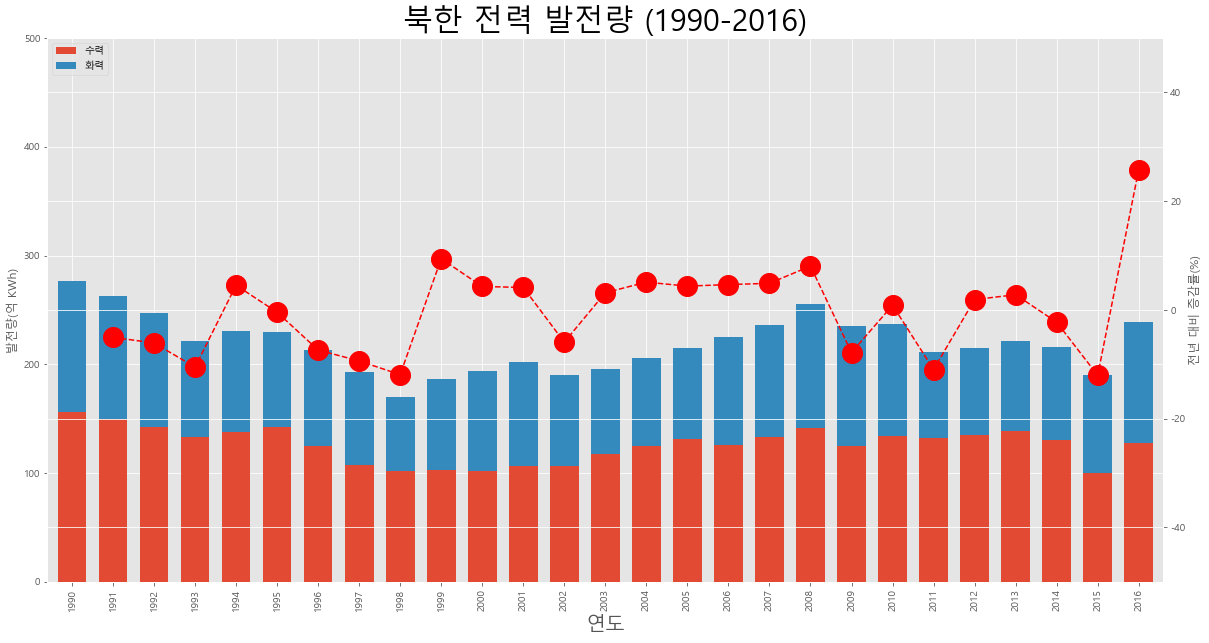

In [19]:
# 2축 그래프 그리기     4.18 matplotlib_secondary_y

import pandas as pd 
import matplotlib.pyplot as plt 

# matplotlib 한글 폰트 오류 문제 해결 
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

# excel 데이터를 데이터 프레임으로 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 
df
# # 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      
df

# 2축 그래프 그리기 
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990-2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

In [ ]:
# 히스토그램 4.19_matplotlib_hist

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 지정

#read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight','acceleration','model year', 'origin', 'name']

# 연비(mpg) 열에 대한 히스토그램 그리기 
df['mpg'].plot(kind='hist',)